In [1]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [2]:
from sklearn import datasets # if datset is not available, iris can be imported from sklearn
import pandas as pd
import numpy as np

In [3]:
iris=pd.read_csv("Iris.csv")

In [4]:
iris.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
5,5.4,3.9,1.7,0.4,Iris-setosa
54,6.5,2.8,4.6,1.5,Iris-versicolor
63,6.1,2.9,4.7,1.4,Iris-versicolor
115,6.4,3.2,5.3,2.3,Iris-virginica
19,5.1,3.8,1.5,0.3,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
111,6.4,2.7,5.3,1.9,Iris-virginica
28,5.2,3.4,1.4,0.2,Iris-setosa
73,6.1,2.8,4.7,1.2,Iris-versicolor
50,7.0,3.2,4.7,1.4,Iris-versicolor


In [5]:
iris.shape

(150, 5)

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [6]:
iris.isnull().any() 
# The datset doesn't have any missing values.

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
dtype: bool

In [7]:
iris.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

#from sklearn.preprocessing import LabelEncoder
#labelencoder=LabelEncoder()
#iris['Class'] = labelencoder.fit_transform(iris['Class'])
# This can be done using label encoder but the disadvantage for using label encoder in this case is that the model will #consider 0<1<2 which is not the case in this situation. 

In [8]:
iris['Class']=iris['Class'].astype("category").cat.codes

In [9]:
iris.sample(20)
# The classes have been changed to  numericals (0 to 2)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
38,4.4,3.0,1.3,0.2,0
72,6.3,2.5,4.9,1.5,1
116,6.5,3.0,5.5,1.8,2
71,6.1,2.8,4.0,1.3,1
66,5.6,3.0,4.5,1.5,1
91,6.1,3.0,4.6,1.4,1
34,4.9,3.1,1.5,0.1,0
118,7.7,2.6,6.9,2.3,2
1,4.9,3.0,1.4,0.2,0
70,5.9,3.2,4.8,1.8,1


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [10]:
iris.corr()


,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


In [11]:
# As none of the independent variables have correlation in the range -0.1 to 0.1 with the target i.e. species variable so we do not have to drop any variable

## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [12]:
iris.var()
# there are no variables having no variance or almost zero variance(variance < 0.1)

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

In [13]:
#import sklearn
#sklearn.feature_selection.VarianceThreshold()
#another way showing no variables have zero variance or almost zero variance

## Question 6

*Plot the scatter matrix for all the variables.*

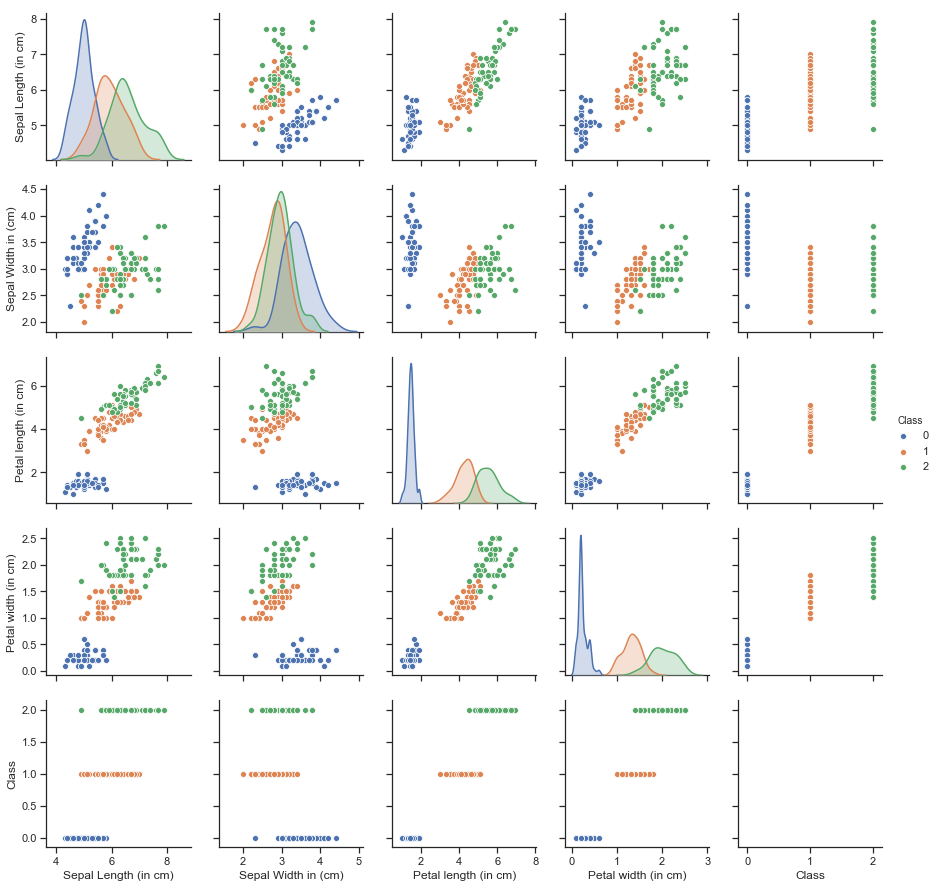

In [15]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(iris, hue="Class")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [16]:
from sklearn.model_selection import train_test_split


In [17]:
x=iris.drop(['Class'],axis=1)
y=iris['Class']

In [18]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 143)
# splitting the dataset into training and test sets with 80-20 ratio.

## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [20]:
# for k=3
model= KNeighborsClassifier(n_neighbors=3)

In [21]:
model=model.fit(xTrain,yTrain)

In [22]:
y_pred=model.predict(xTest)

In [23]:
accuracy_score(yTest,y_pred)
#accuracy for k=3

0.9333333333333333

In [24]:
# Similarly for k=5

In [25]:
model= KNeighborsClassifier(n_neighbors=5)
model=model.fit(xTrain,yTrain)
y_pred=model.predict(xTest)
accuracy_score(yTest,y_pred)

0.9333333333333333

In [26]:
# Similarly for k=9

In [27]:
model= KNeighborsClassifier(n_neighbors=9)
model=model.fit(xTrain,yTrain)
y_pred=model.predict(xTest)
accuracy_score(yTest,y_pred)

0.9333333333333333

## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [28]:
k=np.arange(1,20,2)
k

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [29]:
accuracy_scores=[]
for i in k:
    model= KNeighborsClassifier(n_neighbors= i)
    model=model.fit(xTrain,yTrain)
    y_pred=model.predict(xTest)
    accuracy_scores.append(accuracy_score(yTest,y_pred))

In [30]:
accuracy_scores
#all the accuracy scores for k=1,3,...19

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

In [31]:
mse=[]
for i in accuracy_scores:
    mse.append(1-i)

In [32]:
mse
# mse for all k's

[0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.033333333333333326,
 0.06666666666666665,
 0.06666666666666665,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326,
 0.033333333333333326]

In [33]:
min(mse) # least mse

0.033333333333333326

In [34]:
mse.index(0.033333333333333326)

3

In [35]:
model= KNeighborsClassifier(n_neighbors=7)
model=model.fit(xTrain,yTrain)
y_pred=model.predict(xTest)
accuracy_score(yTest,y_pred)
# Max accuracy with least value of k is achieved at k=7 because in the list k at the third index we have the value 7 which is getting the least mse

0.9666666666666667

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

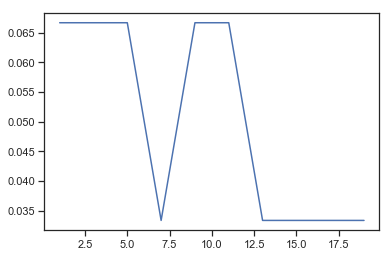

In [36]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k,mse)

# Naive Bayes with Iris Data

In [37]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [38]:
X=iris.drop(['Class'], axis=1)
y=iris['Class']

In [39]:
#Check the dataset
print(y)
print(X)

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
120    2
121    2
122    2
123    2
124    2
125    2
126    2
127    2
128    2
129    2
130    2
131    2
132    2
133    2
134    2
135    2
136    2
137    2
138    2
139    2
140    2
141    2
142    2
143    2
144    2
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int8
     Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                     5.1                  3.5                   1.4   
1                     4.9                  3.0                   1.4   
2                     4.7                  3.2                   1.3   
3                     4.6                  3.1                   1.5   
4                     5.0                  3.6       

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

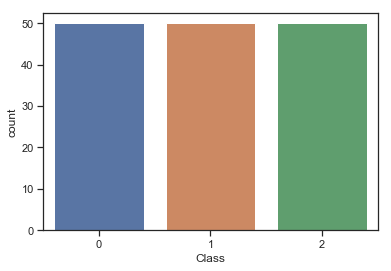

In [40]:
import seaborn as sns
sns.countplot(x='Class', data=iris)

In [41]:
#import matplotlib.pyplot as plt

#plt.hist(iris['Class'])
#plt.ylabel('No of times')
#plt.show()

In [42]:
#Drop Id variable from data

In [43]:

iris_d=iris.style.hide_index()
iris_d


Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
5.1,3.5,1.4,0.2,0
4.9,3,1.4,0.2,0
4.7,3.2,1.3,0.2,0
4.6,3.1,1.5,0.2,0
5,3.6,1.4,0.2,0
5.4,3.9,1.7,0.4,0
4.6,3.4,1.4,0.3,0
5,3.4,1.5,0.2,0
4.4,2.9,1.4,0.2,0
4.9,3.1,1.5,0.1,0


### Question 12 
Find Correlation among all variables and give your insights 

In [44]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [45]:
iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


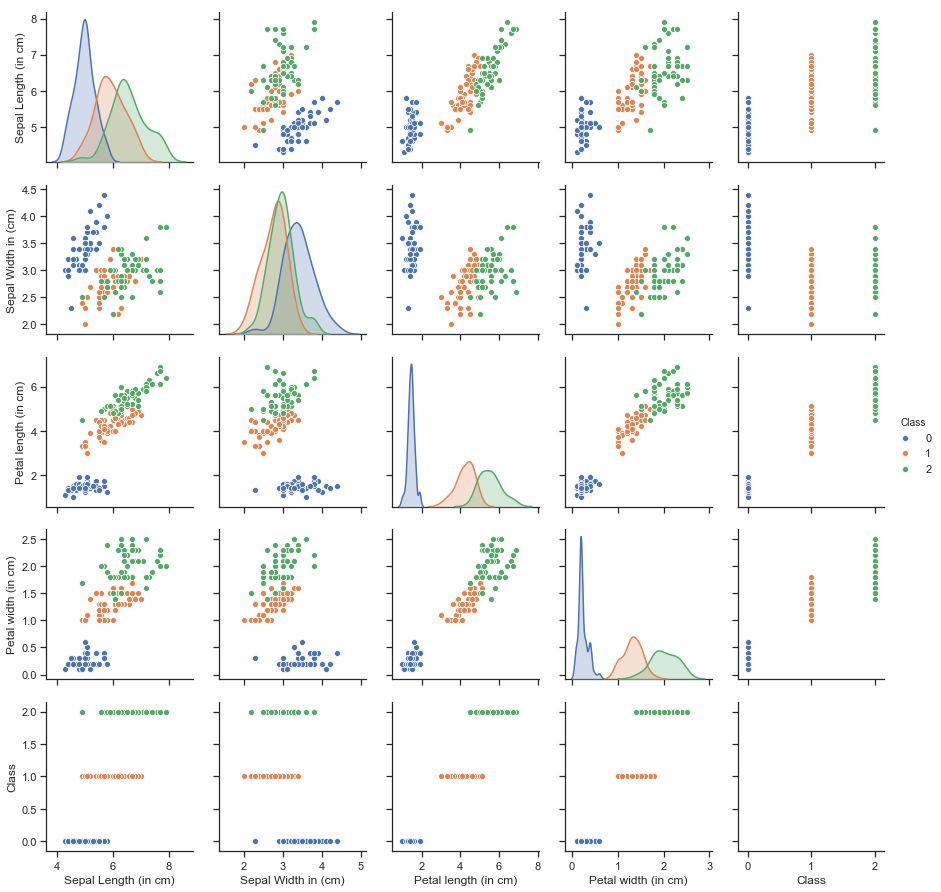

In [46]:
sns.pairplot(iris, hue='Class')

In [47]:
#Inferences
# 1) The setosa class has higher sepal lengths as compared to veriscolor and virginica which tend to have similar average sepal lengths.
# 2) The virginica class has mean sepal width of approximately 4.4 cm whereas the setosa has the minimum out of three classes upto 3.8 cm
# 3) The setosa clearly dominates in the petal length with mean above 6cm whereas versicolor has mean petal length slightly above 2 cm and virginica slightly less than 2 cm being the least out of the three categories.
# 4) Similarly for the petal width seta class has mean petal width of about 2.5 cm and versicolor having 0.5 cm and virginica with least mean petal width.
# 5) Also the correlation for variables petal lent=gth and petal width is 94% and 95% respectively with the class being the highest for all the variables present in the dataset.

### Split data in Training and test set in 80:20.

In [48]:
X_train, X_test,Y_train,Y_test = train_test_split(X,y, test_size = 0.2)

### Question 13 
Do Feature Scaling 

In [49]:
# Use StandardScaler or similar methods

In [50]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

### Question 14 
Train and Fit NaiveBayes Model

In [51]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, Y_train)

In [52]:
#Predict
y_pred_GNB=clf_GNB.predict(X_test)

In [53]:
y_pred_GNB

array([2, 1, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2,
       2, 0, 0, 1, 2, 1, 0, 1], dtype=int8)


### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [54]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred_GNB)
print(confusion_matrix)

[[12  0  0]
 [ 0 11  0]
 [ 0  2  5]]


In [55]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, y_pred_GNB)

0.9333333333333333

In [56]:
#Show precision and Recall metrics

In [57]:
from sklearn.metrics import classification_report  
print(classification_report(Y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        12
           1       0.33      0.18      0.24        11
           2       0.17      0.29      0.21         7

   micro avg       0.33      0.33      0.33        30
   macro avg       0.33      0.32      0.32        30
weighted avg       0.36      0.33      0.34        30

